In [1]:
%run '0.0_init_configuration.ipynb'

### K-Nearest Neighbor

We will use a customer churn dataset from the telecom industry, which includes customer data such as long-distance usage, data usage, monthly revenue, types of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, includes several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data includes a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing. Then we will use K-nearest neighbors to predict customer churn rates.


### Question 1

- We begin by importing the data. Examine the columns and data.
- Notice that the data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.
- Begin by taking an initial look at the data, including both numeric and non-numeric features.

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/churndata_processed.csv")
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [3]:
round(df.describe(),2)

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,...,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,0.43,0.42,0.24,0.29,0.34,0.34,0.29,0.67,0.38,0.59,...,0.39,0.05,0.23,0.43,0.22,0.07,0.12,0.06,0.09,0.11
std,0.40,0.49,0.24,0.45,0.48,0.48,0.45,0.47,0.42,0.49,...,0.49,0.23,0.42,0.50,0.41,0.26,0.32,0.24,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.25,0.00,0.20,0.00,0.00,0.00,0.00,1.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.75,1.00,0.32,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Question 2
- Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric. The non-numeric features will need to be encoded using methods we have discussed in the course.
- Start by identifying the number of unique values each variable takes, then create list variables for categorical, numeric, binary, and ordinal variables.
- Note that the variable 'months' can be treated as numeric, but it may be more convenient to transform it to an ordinal variable.
- For the other categorical variables, examine their values to determine which may be encoded ordinally.

In [4]:
#Contaremos los valores unicos de cada columna 
df_uniques = pd.DataFrame([[i,len(df[i].unique())] for i in df.columns],
             columns = ['Variable', 'Unique Values']).set_index('Variable')

df_uniques

,Unique Values
Variable,
months,5
multiple,2
gb_mon,50
security,2
backup,2
protection,2
support,2
unlimited,2
contract,3


In [5]:
#index devuelve el nombre de las columnas que cumple esa condición
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value',
 'payment_Credit Card',
 'payment_Mailed Check',
 'internet_type_DSL',
 'internet_type_Fiber Optic',
 'internet_type_None',
 'offer_Offer A',
 'offer_Offer B',
 'offer_Offer C',
 'offer_Offer D',
 'offer_Offer E']

In [6]:
# filtrar las variables que sean mayor a 3 y/o igual a 6
categorical_variable = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variable

['months', 'contract', 'satisfaction']

In [7]:
[df[i].unique() for i in categorical_variable]

[array([0.  , 0.25, 0.5 , 1.  , 0.75]),
 array([0. , 0.5, 1. ]),
 array([0.5 , 0.25, 0.  , 0.75, 1.  ])]

In [8]:
ordinal_variables = ['contract', 'satisfaction']

In [9]:
df['months'].unique()

array([0.  , 0.25, 0.5 , 1.  , 0.75])

In [10]:
# dado que mont tiene 5 valores fijos se considera ordinal.
ordinal_variables.append('months')
ordinal_variables

['contract', 'satisfaction', 'months']

In [11]:
numeric_variable = list(set(df.columns) - 
                    set(ordinal_variables) - 
                    set(categorical_variable) - 
                    set(binary_variables))
numeric_variable

['gb_mon', 'monthly']

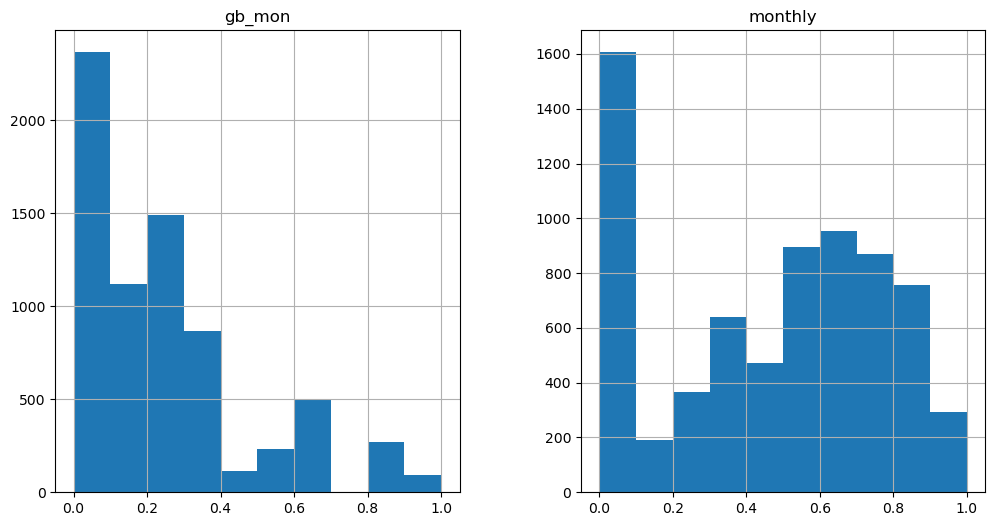

In [12]:
df[numeric_variable].hist(figsize=(12,6))
plt.show()

### Question 3

- Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
- Scale the data using one of the scaling methods discussed in the course.
- Save the processed dataframe as a comma-separated file: 'churndata_processed.csv'

In [13]:
# Usamos LabelBinarizer, LabelEncoder, OrdinalEncoder

lb, le = LabelBinarizer(), LabelEncoder()

#Usamos LabelEncoder() para las ordinales
for column in ordinal_variables:
    df[column] = le.fit_transform(df[column])

#Resumen de las variables codificadas
df[ordinal_variables].astype('category').describe()

,contract,satisfaction,months
count,7043,7043,7043
unique,3,5,5
top,0,2,0
freq,3610,2665,2470


In [14]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

df[binary_variables].astype('category').describe()

,multiple,security,backup,protection,support,unlimited,paperless,churn_value,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
freq,4072,5024,4614,4621,4999,4745,4171,5174,4294,6658,5391,4008,5517,6523,6219,6628,6441,6238


In [15]:
# Se elimina las variables ya trasnformadas, como las variables categoricas son ordinales se trasnformaron
categorical_variable = list(set(categorical_variable) - set(ordinal_variables))
categorical_variable

[]

In [16]:
#Aplicamos one-hot usando get_dummies method para las columnoas categoricas, aun que no es necesario ya que fueron trasnformadas a ordinal
df = pd.get_dummies(df, columns=categorical_variable, drop_first=True)
df.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_Credit Card',
       'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E'],
      dtype='object')

In [17]:
df.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.734204,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.754792,0.592219,...,0.390317,0.054664,0.234559,0.430924,0.216669,0.073832,0.116996,0.058924,0.085475,0.114298
std,1.592924,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.848468,0.491457,...,0.487856,0.227340,0.423753,0.495241,0.412004,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
# Escalamos los valores entre 0 y 1 usando MinMaxScaler
mm = MinMaxScaler()

for column in [ordinal_variables + numeric_variable]:
    df[column] = mm.fit_transform(df[column])

round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.434,0.398,0.0,0.000,0.250,0.750,1.0
multiple,7043.0,0.422,0.494,0.0,0.000,0.000,1.000,1.0
gb_mon,7043.0,0.241,0.240,0.0,0.035,0.200,0.318,1.0
security,7043.0,0.287,0.452,0.0,0.000,0.000,1.000,1.0
backup,7043.0,0.345,0.475,0.0,0.000,0.000,1.000,1.0
protection,7043.0,0.344,0.475,0.0,0.000,0.000,1.000,1.0
support,7043.0,0.290,0.454,0.0,0.000,0.000,1.000,1.0
unlimited,7043.0,0.674,0.469,0.0,0.000,1.000,1.000,1.0
contract,7043.0,0.377,0.424,0.0,0.000,0.000,1.000,1.0
paperless,7043.0,0.592,0.491,0.0,0.000,1.000,1.000,1.0


In [19]:
# Save a copy of the processed data for later use
outputfile = 'churndata_processed.csv'
df.to_csv(outputfile, index=False)